In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
df_1 = pd.read_csv("../data/01-raw/raw_data.csv")
df_1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
df_1.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df_1["Reached.on.Time_Y.N"].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Text(0.5, 0, 'Reached.on.Time_Y.N')

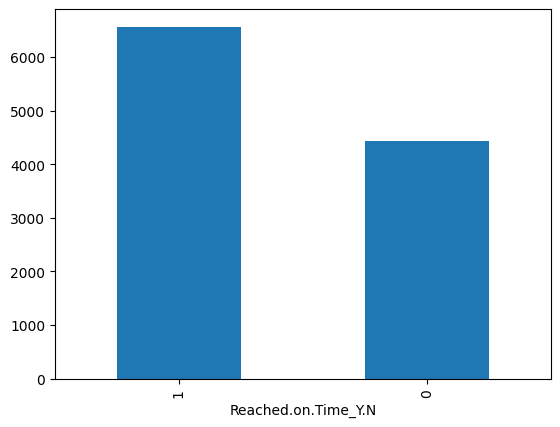

In [6]:
df_1["Reached.on.Time_Y.N"].value_counts().plot(kind='bar')
plt.xlabel("Reached.on.Time_Y.N")

In [7]:
print(df_1.columns)

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [8]:
categorical_cols = ["Warehouse_block", "Mode_of_Shipment", "Customer_rating", "Product_importance", "Gender", "Customer_care_calls"]

numeric_cols = ["Cost_of_the_Product", "Discount_offered", "Weight_in_gms", "Prior_purchases"]

label_col = "Reached.on.Time_Y.N"

In [9]:
df_1["Prior_purchases"].value_counts(normalize=True)

Prior_purchases
3     0.359578
2     0.236294
4     0.195927
5     0.117011
6     0.051005
10    0.016183
7     0.012365
8     0.011637
Name: proportion, dtype: float64

Text(0.5, 0, 'Prior_purchases')

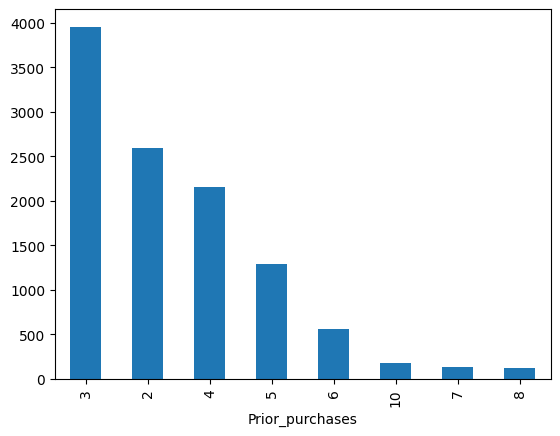

In [10]:
df_1["Prior_purchases"].value_counts().plot(kind='bar')
plt.xlabel("Prior_purchases")

Text(0.5, 0, 'Warehouse_block')

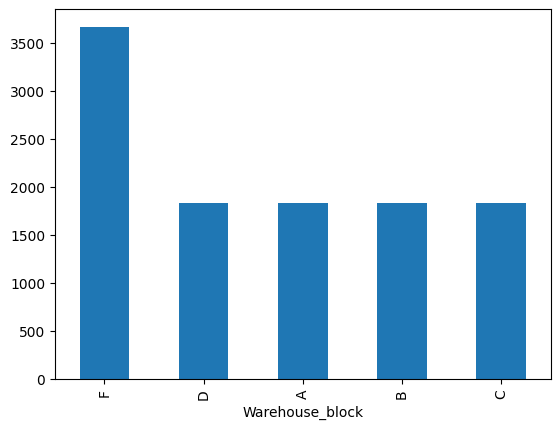

In [11]:
df_1["Warehouse_block"].value_counts().plot(kind='bar')
plt.xlabel("Warehouse_block")

Text(0.5, 0, 'Mode_of_Shipment')

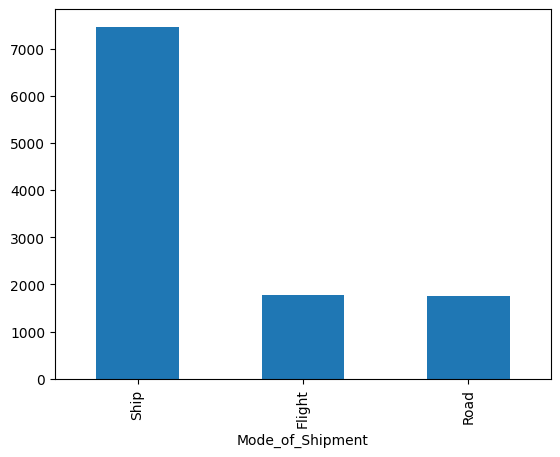

In [12]:
df_1["Mode_of_Shipment"].value_counts().plot(kind='bar')
plt.xlabel("Mode_of_Shipment")

In [13]:
# df_1[categorical_cols] = df_1[categorical_cols].astype('category')
df_1[numeric_cols] = df_1[numeric_cols].apply(pd.to_numeric, errors='coerce')

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


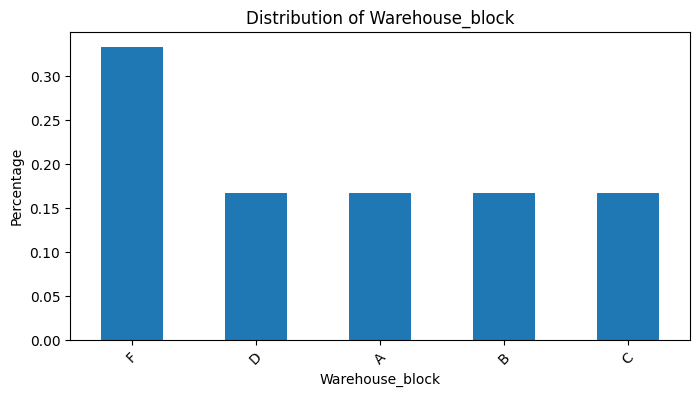

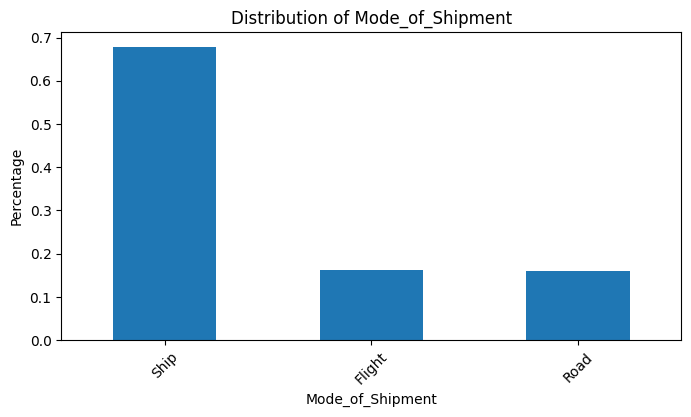

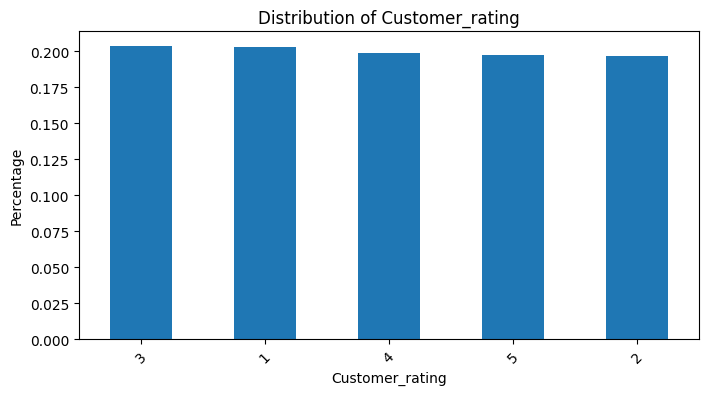

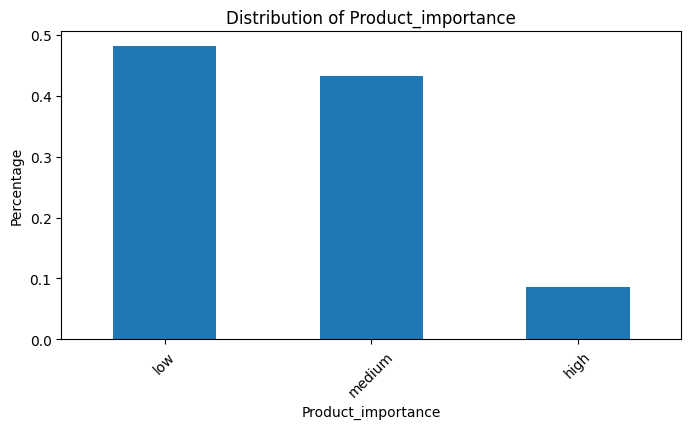

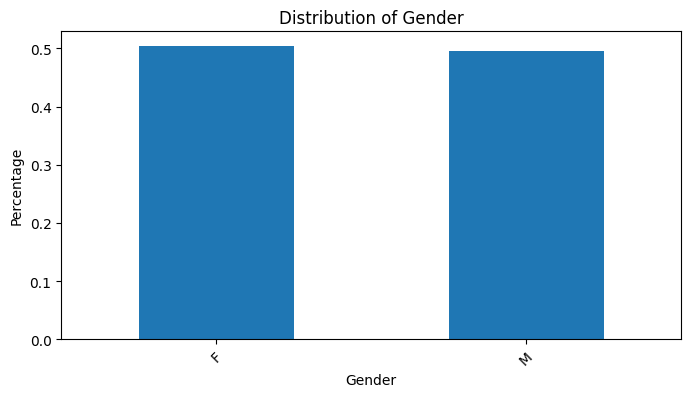

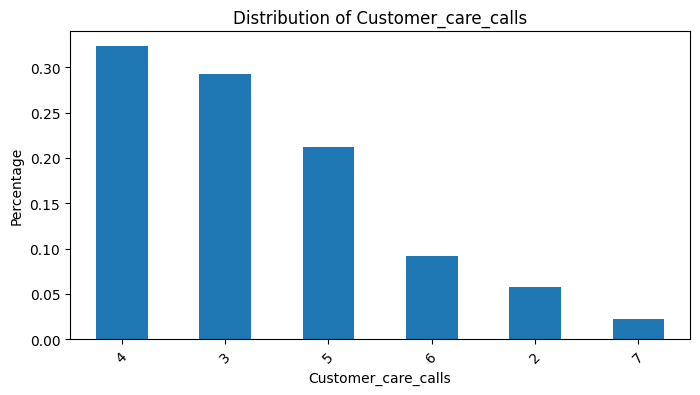

In [14]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df_1[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.show()

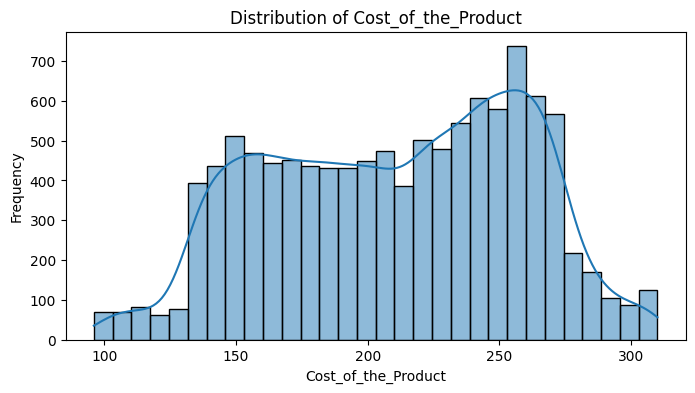

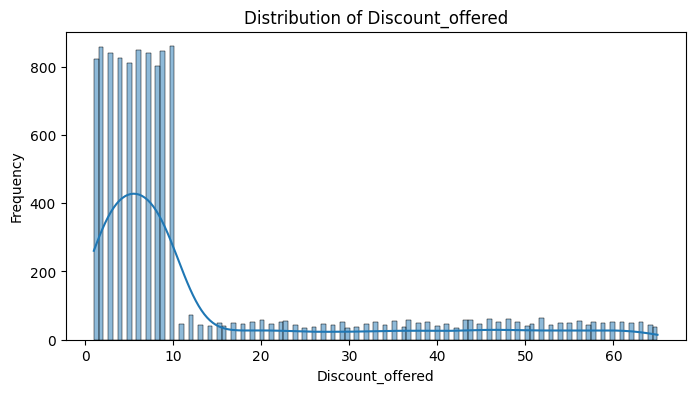

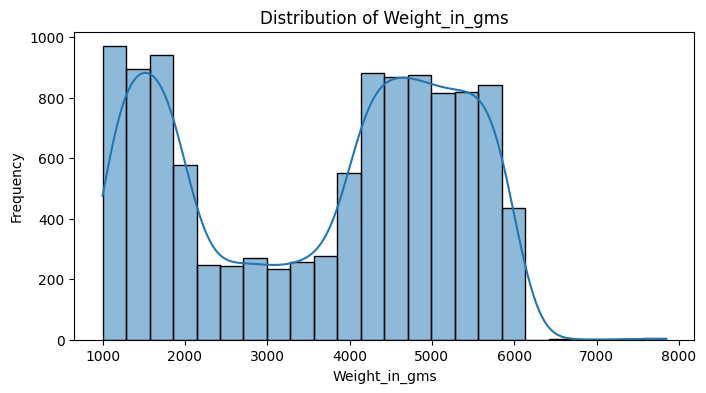

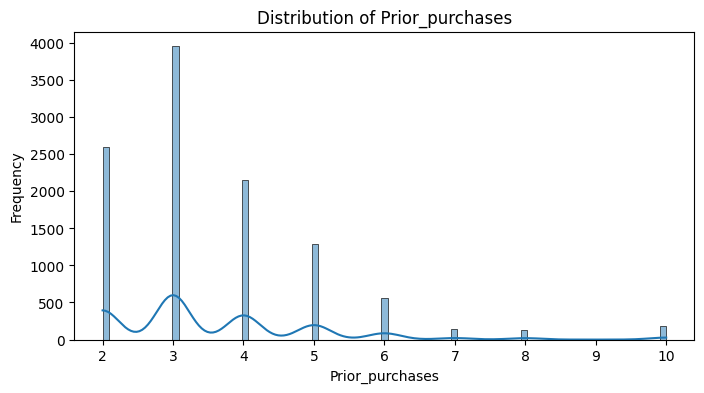

In [15]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_1[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Reached.on.Time_Y.N by Mode_of_Shipment')

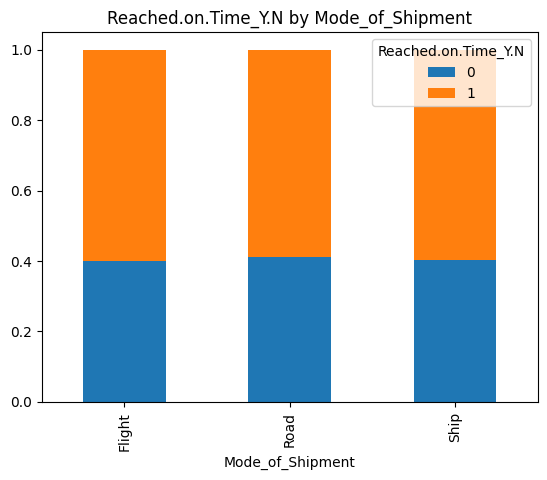

In [16]:
df_1.groupby("Mode_of_Shipment")[label_col].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
plt.title('Reached.on.Time_Y.N by Mode_of_Shipment')

In [17]:
df_1.groupby(label_col)[numeric_cols].mean()

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Prior_purchases
Reached.on.Time_Y.N,,,,
0,214.498647,5.545987,4168.668395,3.670424
1,207.289197,18.663721,3272.640104,3.498095


In [18]:
df_1.groupby("Mode_of_Shipment")[numeric_cols].mean()

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Prior_purchases
Mode_of_Shipment,,,,
Flight,209.306697,13.160945,3629.378165,3.566685
Road,210.475568,13.084091,3649.550568,3.581250
Ship,210.343072,13.491959,3631.457518,3.564594


## Data Preprocessing

In [19]:
df_preprocess = df_1.copy()

In [20]:
# mapping 

df_preprocess["Product_importance"] = df_preprocess["Product_importance"].map({'low': 0, 'medium': 1, 'high': 2})

df_preprocess["Gender"] = df_preprocess["Gender"].map({'F': 0, 'M': 1})

In [21]:
df_preprocess["Product_importance"].value_counts(normalize=True)

Product_importance
0    0.481589
1    0.432221
2    0.086190
Name: proportion, dtype: float64

In [22]:
df_preprocess["Customer_rating"].value_counts()

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64

In [23]:
df_preprocess[["Customer_rating", "Product_importance"]].value_counts()

Customer_rating  Product_importance
1                0                     1117
4                0                     1060
3                0                     1054
5                0                     1051
2                0                     1015
3                1                     1001
2                1                      951
4                1                      936
5                1                      934
1                1                      932
2                2                      199
4                2                      193
1                2                      186
5                2                      186
3                2                      184
Name: count, dtype: int64

In [24]:
# One hot encoding for other categorical variables

from sklearn.preprocessing import OneHotEncoder

one_hot_encoding_vars = ["Warehouse_block", "Mode_of_Shipment"]

df_preprocess = pd.get_dummies(df_preprocess, columns=one_hot_encoding_vars, drop_first=False, dtype=int)

df_preprocess.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,0,0,44,1233,1,0,0,0,1,0,1,0,0
1,2,4,5,216,2,0,1,59,3088,1,0,0,0,0,1,1,0,0
2,3,2,2,183,4,0,1,48,3374,1,1,0,0,0,0,1,0,0
3,4,3,3,176,4,1,1,10,1177,1,0,1,0,0,0,1,0,0
4,5,2,2,184,3,1,0,46,2484,1,0,0,1,0,0,1,0,0


In [25]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       10999 non-null  int64
 1   Customer_care_calls      10999 non-null  int64
 2   Customer_rating          10999 non-null  int64
 3   Cost_of_the_Product      10999 non-null  int64
 4   Prior_purchases          10999 non-null  int64
 5   Product_importance       10999 non-null  int64
 6   Gender                   10999 non-null  int64
 7   Discount_offered         10999 non-null  int64
 8   Weight_in_gms            10999 non-null  int64
 9   Reached.on.Time_Y.N      10999 non-null  int64
 10  Warehouse_block_A        10999 non-null  int64
 11  Warehouse_block_B        10999 non-null  int64
 12  Warehouse_block_C        10999 non-null  int64
 13  Warehouse_block_D        10999 non-null  int64
 14  Warehouse_block_F        10999 non-null  int64
 15  Mo

In [26]:
# Standardization of numeric columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_preprocess[numeric_cols] = scaler.fit_transform(df_preprocess[numeric_cols])

In [27]:
df_preprocess.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
Customer_care_calls,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000
Customer_rating,2.000000,5.000000,2.000000,3.000000,2.000000,1.000000,4.000000,1.000000,4.000000,2.000000
Cost_of_the_Product,-0.690722,0.120746,-0.565881,-0.711529,-0.545074,-1.002825,0.828179,0.474462,-1.252507,-0.961211
Prior_purchases,-0.372735,-1.029424,0.283954,0.283954,-0.372735,-0.372735,-0.372735,-1.029424,-0.372735,-0.372735
Product_importance,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
Gender,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Discount_offered,1.889983,2.815636,2.136824,-0.208162,2.013404,-0.084741,-0.640133,2.136824,-0.146451,0.964331
Weight_in_gms,-1.468240,-0.333893,-0.159002,-1.502484,-0.703244,-1.355722,-0.772344,-0.507561,-1.084213,-1.496369
Reached.on.Time_Y.N,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Building

In [28]:
# Split data into features and labels

X = df_preprocess.drop(columns=[label_col, "ID"])
y = df_preprocess[label_col]

In [29]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=300,
                                       class_weight='balanced',  # to handle class imbalance
                                       random_state=42,
                                       n_jobs=-1
                                       )

#Training timer
start_time = time.time()

rf_classifier.fit(X_train, y_train)

train_time = time.time() - start_time
print(f"Training time: {train_time:.2f} seconds")

Training time: 0.40 seconds


In [31]:
# Predict on test set for Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

In [32]:
# Evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest Classifier Performance:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Performance:
[[ 915  416]
 [ 742 1227]]


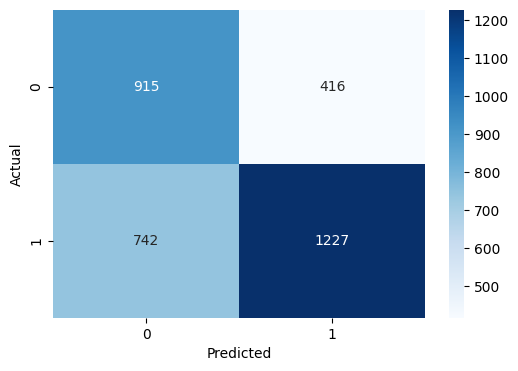

In [33]:
# visualization of confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# accuracy, precision, recall, f1-score
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

0.649090909090909
              precision    recall  f1-score   support

           0       0.55      0.69      0.61      1331
           1       0.75      0.62      0.68      1969

    accuracy                           0.65      3300
   macro avg       0.65      0.66      0.65      3300
weighted avg       0.67      0.65      0.65      3300



In [35]:
# Checking for overfitting
train_accuracy = rf_classifier.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy}')
test_accuracy = rf_classifier.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Test Accuracy: 0.649090909090909


In [36]:
# XgBoost Classifier

import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False,
                                   n_estimators = 500,
                                   max_depth = 6,
                                   n_jobs = -1, 
                                   eval_metric='logloss', 
                                   random_state=42)
# Training timer
start_time = time.time()

xgb_classifier.fit(X_train, y_train)

train_time = time.time() - start_time
print(f"Training time: {train_time:.2f} seconds")

Training time: 0.34 seconds


In [37]:
# Predict on test set for XgBoost Classifier
y_pred_xgb = xgb_classifier.predict(X_test)

In [38]:
# Evaluation for XgBoost Classifier
print("XgBoost Classifier Performance:")
print(confusion_matrix(y_test, y_pred_xgb))

XgBoost Classifier Performance:
[[ 805  526]
 [ 630 1339]]


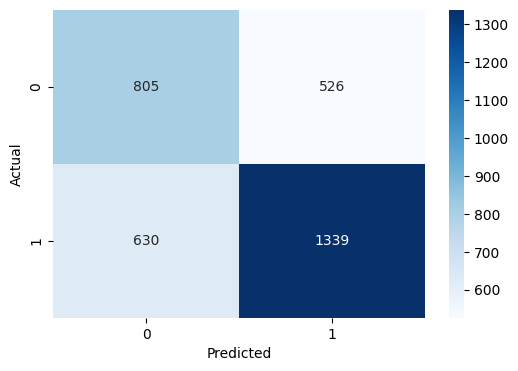

In [39]:
# visualization of confusion matrix for xgb
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
# Accuracy, precision, recall, f1-score for XgBoost
print(accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

0.6496969696969697
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1331
           1       0.72      0.68      0.70      1969

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



In [41]:
# Hyperparameter Tuning can be done using RandomsearchCV for XgBoost

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': list(range(100, 501, 50)),
    'max_depth': list(range(3, 11, 2)),
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': list(range(0, 5)),
    'reg_alpha': list(range(0, 5)),
    'reg_lambda': list(range(0, 5))}

# Hyperparameter tuning for XgBoost Classifier
xgb_classifier_tune = xgb.XGBClassifier(use_label_encoder=False,  
                                        eval_metric='logloss', 
                                        random_state=42)

xgb_grid_search = RandomizedSearchCV(estimator=xgb_classifier_tune,
                                        param_distributions=param_grid,
                                        n_iter=200,
                                        scoring='recall',
                                        cv=3,
                                        verbose=2,
                                        random_state=42,
                                        n_jobs=-1)

xgb_grid_search.fit(X_train, y_train)
best_xgb_model = xgb_grid_search.best_estimator_
print("Best Hyperparameters:", xgb_grid_search.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 3, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 0.6}


In [42]:
# Predict on test set for tuned XgBoost Classifier
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

# Evaluation for tuned XgBoost Classifier
print("Tuned XgBoost Classifier Performance:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

Tuned XgBoost Classifier Performance:
[[ 275 1056]
 [ 205 1764]]


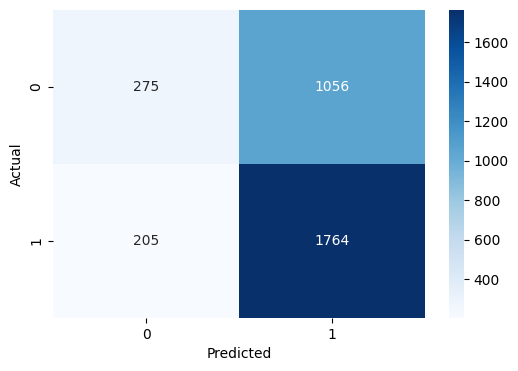

In [43]:
# Visualization of confusion matrix for tuned xgb
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()

In [44]:
# Accuracy, precision, recall, f1-score for tuned XgBoost
print(accuracy_score(y_test, y_pred_xgb_tuned))
print(classification_report(y_test, y_pred_xgb_tuned))

0.6178787878787879
              precision    recall  f1-score   support

           0       0.57      0.21      0.30      1331
           1       0.63      0.90      0.74      1969

    accuracy                           0.62      3300
   macro avg       0.60      0.55      0.52      3300
weighted avg       0.60      0.62      0.56      3300



In [45]:
# Hyperparameter Tuning can be done using RandomizedSearchCV for Random Forest as well

param_grid = {
    'n_estimators': list(range(100, 801, 100)),     # number of trees
    'max_depth': [None] + list(range(5, 31, 5)),    # depth of each tree
    'min_samples_split': list(range(2, 11)),        # how many samples required to split
    'min_samples_leaf': list(range(1, 11)),         # minimum samples in each leaf
    'max_features': ['sqrt', 'log2', None],         # number of features per split
    'bootstrap': [True, False],                     # sampling strategy
    'class_weight': [None, 'balanced', 'balanced_subsample']  # handle imbalance
}
rf_classifier_tune = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_grid_search = RandomizedSearchCV(estimator=rf_classifier_tune,
                                    param_distributions=param_grid,
                                    n_iter=200,
                                    scoring='recall',
                                    cv=3,
                                    verbose=2,
                                    random_state=42,
                                    n_jobs=-1)

rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
print("Best Hyperparameters for RF:", rf_grid_search.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best Hyperparameters for RF: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': None, 'class_weight': 'balanced_subsample', 'bootstrap': False}


In [46]:
# Accuracy, precision, recall, f1-score for tuned random forest
y_pred_rf_tuned = best_rf_model.predict(X_test)
print(accuracy_score(y_test, y_pred_rf_tuned))
print(classification_report(y_test, y_pred_rf_tuned))

0.6424242424242425
              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1331
           1       0.72      0.66      0.69      1969

    accuracy                           0.64      3300
   macro avg       0.63      0.64      0.63      3300
weighted avg       0.65      0.64      0.64      3300

